# Análise de solicitação de crédito

**Objetivo desta análise**: determinar para cada solicitação de crédito o valor de **Risk** baseado nos outros atributos (por exemplo, Age, Sex, Job, Housing, ...).

Este dataset e a descrição do problema estão disponíveis em https://www.kaggle.com/uciml/german-credit

$Risk \leftarrow Age + Sex + Job + \cdots + Purpose$

## Aquisição dos dados e pré-processamento

In [1]:
import pandas as pd
#df = pd.read_csv("https://raw.githubusercontent.com/fbarth/ml-espm/master/dataset/german_credit_data.csv")
df = pd.read_csv("../../dataset/german_credit_data.csv")

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
df = df.drop(columns=['Unnamed: 0'])

## Análise descritiva

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df = df.rename(columns={
    "Age": "age", 
    "Sex": "sex", 
    "Job": "job", 
    "Housing": "housing", 
    "Saving accounts": "savingAccount",
    "Checking account": "checkingAccount",
    "Credit amount": "creditAmount",
    "Duration": "duration",
    "Purpose": "purpose",
    "Risk": "risk"
})

In [8]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
df['risk'].value_counts()

good    700
bad     300
Name: risk, dtype: int64

Visto que a variável Risk é categórica então podemos dizer que este é um problema de **classificação**.

Isto é importante para: 
* Definir as métricas de como o modelo será avaliado, e;
* Escolher o melhor algoritmo para criar o modelo.

Descrição dos atributos: 

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

*Dúvida*: deixamos o atributo Job como número ou transformamos para categórico? 

In [10]:
cleanup_nums = {"savingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,1.0,moderate,5951,48,radio/TV,bad
2,49,male,1,own,1.0,NaN,2096,12,education,good
3,45,male,2,free,1.0,little,7882,42,furniture/equipment,good
4,53,male,2,free,1.0,little,4870,24,car,bad


In [11]:
cleanup_nums = {"checkingAccount": 
                {"little": 1, "moderate": 2, "quite rich": 3, "rich": 4}
               }
df.replace(cleanup_nums, inplace=True)
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,1.0,1169,6,radio/TV,good
1,22,female,2,own,1.0,2.0,5951,48,radio/TV,bad
2,49,male,1,own,1.0,NaN,2096,12,education,good
3,45,male,2,free,1.0,1.0,7882,42,furniture/equipment,good
4,53,male,2,free,1.0,1.0,4870,24,car,bad


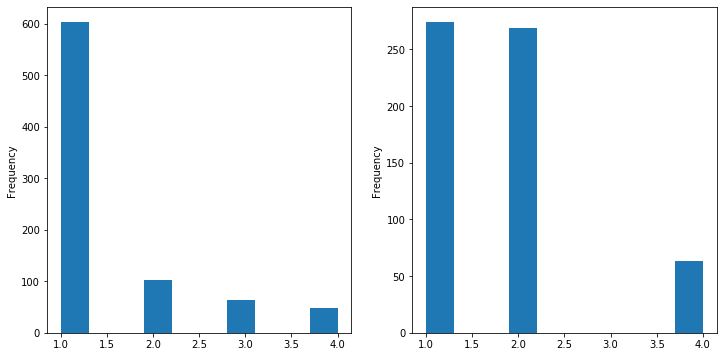

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['savingAccount'].plot(kind='hist', ax=axes[0])
df['checkingAccount'].plot(kind='hist', ax=axes[1])

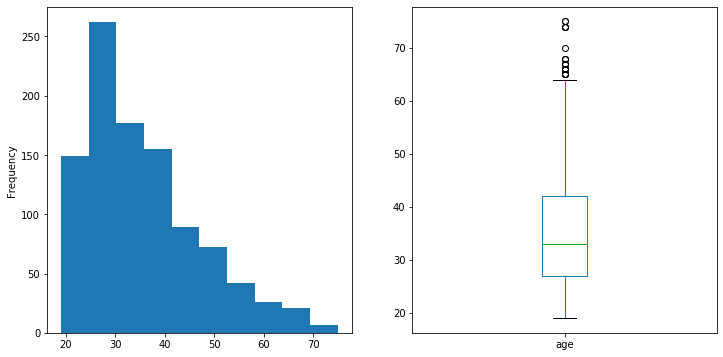

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['age'].plot(kind='hist', ax=axes[0])
df['age'].plot(kind='box', ax=axes[1])

In [15]:
df['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

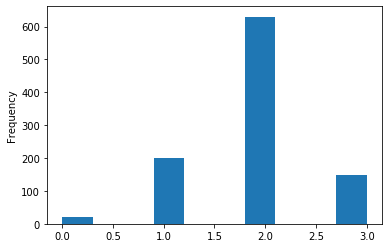

In [16]:
df['job'].plot(kind='hist')

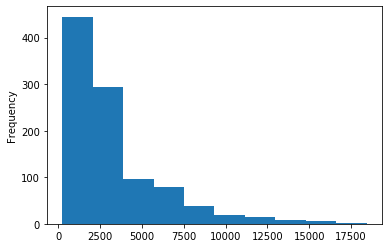

In [17]:
df['creditAmount'].plot(kind='hist')

In [18]:
df['creditAmount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: creditAmount, dtype: float64

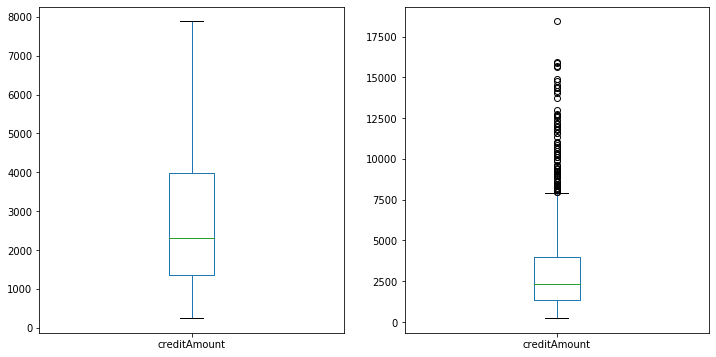

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
#figure(figsize=(7,5))
df['creditAmount'].plot(kind='box', showfliers=False, ax=axes[0])
df['creditAmount'].plot(kind='box', ax=axes[1])

In [20]:
df['sex'].value_counts()

male      690
female    310
Name: sex, dtype: int64

In [21]:
df['job'].value_counts()

2    630
1    200
3    148
0     22
Name: job, dtype: int64

In [22]:
df['housing'].value_counts()

own     713
rent    179
free    108
Name: housing, dtype: int64

In [23]:
df['savingAccount'].value_counts()

1.0    603
2.0    103
3.0     63
4.0     48
Name: savingAccount, dtype: int64

In [24]:
df['savingAccount'].isnull().sum() / df.shape[0]

0.183

In [25]:
df['checkingAccount'].value_counts()

1.0    274
2.0    269
4.0     63
Name: checkingAccount, dtype: int64

In [26]:
df['checkingAccount'].isnull().sum() / df.shape[0]

0.394

In [27]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,1.0,1169,6,radio/TV,good
1,22,female,2,own,1.0,2.0,5951,48,radio/TV,bad
2,49,male,1,own,1.0,NaN,2096,12,education,good
3,45,male,2,free,1.0,1.0,7882,42,furniture/equipment,good
4,53,male,2,free,1.0,1.0,4870,24,car,bad


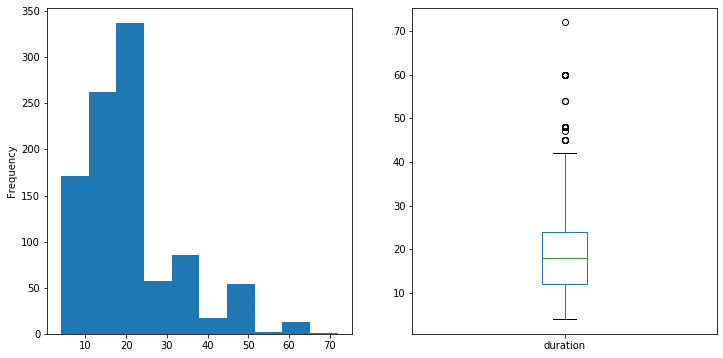

In [28]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['duration'].plot(kind='hist', ax=axes[0])
df['duration'].plot(kind='box', ax=axes[1])

In [29]:
df['purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: purpose, dtype: int64

In [30]:
df['purpose'].isnull().sum() / df.shape[0]

0.0

In [31]:
df['risk'].isnull().sum() / df.shape[0]

0.0

In [32]:
df.isnull().sum()

age                  0
sex                  0
job                  0
housing              0
savingAccount      183
checkingAccount    394
creditAmount         0
duration             0
purpose              0
risk                 0
dtype: int64

Text(0, 0.5, 'Duration')

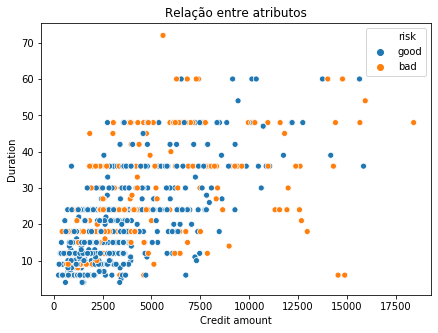

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

import seaborn as sns
x = sns.scatterplot(x='creditAmount', y='duration', data=df, hue='risk')
x.set_title("Relação entre atributos")
x.set_xlabel("Credit amount")
x.set_ylabel("Duration")

Text(0.5, 0, 'Checking Account')

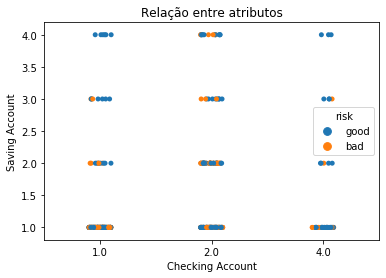

In [57]:
import seaborn as sns
x = sns.stripplot(x='checkingAccount', y='savingAccount', data=df, hue='risk', jitter=0.1)
x.set_title("Relação entre atributos")
x.set_ylabel("Saving Account")
x.set_xlabel("Checking Account")

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

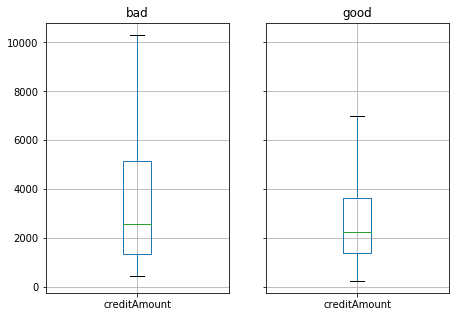

In [34]:
grouped = df[['creditAmount','risk']].groupby('risk')
grouped.boxplot(figsize=(7,5), showfliers=False)

In [58]:
df.shape

(1000, 10)

# Separando parte dos exemplos para validação final

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:9], df['risk'], test_size=0.1, random_state=4)

In [60]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,1.0,1.0,2522,30,radio/TV
304,44,male,2,free,3.0,NaN,10127,48,car
964,22,male,1,own,1.0,2.0,454,6,repairs
102,24,female,2,own,1.0,NaN,932,6,radio/TV
867,42,male,2,own,1.0,NaN,3331,12,furniture/equipment


In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(900, 9)
(900,)
(100, 9)
(100,)


In [62]:
y_train.value_counts()

good    628
bad     272
Name: risk, dtype: int64

In [63]:
y_test.value_counts()

good    72
bad     28
Name: risk, dtype: int64

# Modelagem com algoritmos indutores de árvores de decisão

A atual implementação de árvore de decisão no sklearn (tree.DecisionTreeClassifier()) não consegue trabalhar com dados categóricos. Sendo assim, é necessário transformar os atributos categóricos em numéricos quando houver uma relação de grandeza entre os valores. Caso contrário, vamos simplesmente desconsiderar os atributos.

Por enquanto, não vamos considerar a abordagem de *one hot* ou *get_dummies* pois esta abordagem gera uma tabela com alta dimensionalidade - algo que algoritmos de árvore de decisão não conseguem lidar muito bem.

In [64]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,1.0,1.0,2522,30,radio/TV
304,44,male,2,free,3.0,NaN,10127,48,car
964,22,male,1,own,1.0,2.0,454,6,repairs
102,24,female,2,own,1.0,NaN,932,6,radio/TV
867,42,male,2,own,1.0,NaN,3331,12,furniture/equipment


In [104]:
#
# Removendo atributos categóricos e atributos numéricos com valores faltantes
# Obs.: O algoritmo DecisionTreeClassifier não consegue trabalhar com exemplos que tenham atributos
# faltantes.
#
X_train_ = X_train.drop(columns=['sex','housing','savingAccount','checkingAccount','purpose'])

In [105]:
X_train_

,age,job,creditAmount,duration
239,39,2,2522,30
304,44,2,10127,48
964,22,1,454,6
102,24,2,932,6
867,42,2,3331,12
...,...,...,...,...
897,35,2,1592,12
709,37,1,2118,9
439,26,0,609,12
174,26,2,3414,21


In [106]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train_, y_train)
scores = cross_val_score(model, X_train_, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.69 (+/- 0.02)


[Text(153.45000000000002, 190.26, 'X[3] <= 29.0\ngini = 0.422\nsamples = 900\nvalue = [272, 628]'),
 Text(83.7, 135.9, 'X[2] <= 8630.5\ngini = 0.381\nsamples = 706\nvalue = [181, 525]'),
 Text(55.800000000000004, 81.53999999999999, 'X[3] <= 7.5\ngini = 0.374\nsamples = 699\nvalue = [174, 525]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.167\nsamples = 76\nvalue = [7, 69]'),
 Text(83.7, 27.180000000000007, 'gini = 0.392\nsamples = 623\nvalue = [167, 456]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(223.20000000000002, 135.9, 'X[0] <= 29.5\ngini = 0.498\nsamples = 194\nvalue = [91, 103]'),
 Text(167.4, 81.53999999999999, 'X[2] <= 4235.0\ngini = 0.465\nsamples = 68\nvalue = [43, 25]'),
 Text(139.5, 27.180000000000007, 'gini = 0.483\nsamples = 22\nvalue = [9, 13]'),
 Text(195.3, 27.180000000000007, 'gini = 0.386\nsamples = 46\nvalue = [34, 12]'),
 Text(279.0, 81.53999999999999, 'X[0] <= 41.5\ngini = 0.472\nsamples = 126\nva

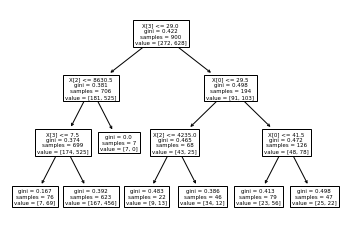

In [107]:
tree.plot_tree(model)

In [108]:
X_train_.columns

Index(['age', 'job', 'creditAmount', 'duration'], dtype='object')

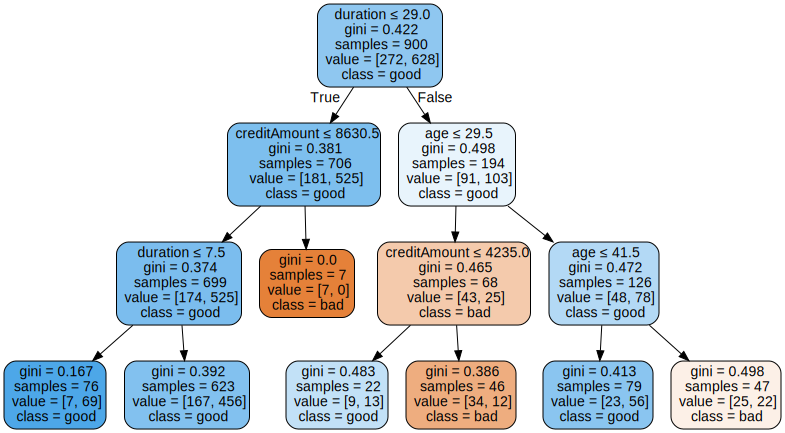

In [109]:
import graphviz
g = tree.export_graphviz(model, out_file=None, 
                      feature_names=X_train_.columns,  
                      class_names=['bad','good'],   
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(g) 
graph

In [110]:
from sklearn import tree
for i in [1,2,3,4,5,6,7,8,9,10,None]:
    model = tree.DecisionTreeClassifier(max_depth=i)
    model = model.fit(X_train_, y_train)
    scores = cross_val_score(model, X_train_, y_train, cv=5)
    print("Max depth = "+ str(i)+ " Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Max depth = 1 Accuracy: 0.68 (+/- 0.03)
Max depth = 2 Accuracy: 0.68 (+/- 0.02)
Max depth = 3 Accuracy: 0.69 (+/- 0.02)
Max depth = 4 Accuracy: 0.68 (+/- 0.03)
Max depth = 5 Accuracy: 0.66 (+/- 0.04)
Max depth = 6 Accuracy: 0.68 (+/- 0.02)
Max depth = 7 Accuracy: 0.66 (+/- 0.02)
Max depth = 8 Accuracy: 0.66 (+/- 0.03)
Max depth = 9 Accuracy: 0.66 (+/- 0.02)
Max depth = 10 Accuracy: 0.66 (+/- 0.03)
Max depth = None Accuracy: 0.63 (+/- 0.02)


In [111]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_, y_train)

In [112]:
#
# Roubo! Validando modelo no conjunto de treinamento
# Objetivo: mostrar o quanto que uma árvore de decisão sem poda faz overfitting.
#
from sklearn.metrics import accuracy_score
predicted = model.predict(X_train_)
accuracy_score(predicted, y_train)

1.0

# Modelando com Knn (Aprendizado baseado em instâncias)

O algoritmo Knn só consegue manipular atributos independentes numéricos. E os mesmos precisam estar normalizados. Por isso, teremos que normalizar (https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc). 

In [113]:
X_train_.head()

,age,job,creditAmount,duration
239,39,2,2522,30
304,44,2,10127,48
964,22,1,454,6
102,24,2,932,6
867,42,2,3331,12


In [114]:
from sklearn import preprocessing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_train_), 
                              index=X_train_.index, 
                              columns=X_train_.columns
                             )

In [115]:
X_train_scaled.head()

,age,job,creditAmount,duration
239,0.357143,0.666667,0.125014,0.382353
304,0.446429,0.666667,0.543469,0.647059
964,0.053571,0.333333,0.011225,0.029412
102,0.089286,0.666667,0.037526,0.029412
867,0.410714,0.666667,0.169528,0.117647


In [116]:
# melhor k
k = X_train_scaled.shape[0]**(1/2)
k

30.0

In [117]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(30,60):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_scaled, y_train)
    scores = cross_val_score(modelK, X_train_scaled, y_train, cv=5)
    print("Max depth = "+ str(i)+ " Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Max depth = 30 Accuracy: 0.700 (+/- 0.021)
Max depth = 31 Accuracy: 0.696 (+/- 0.013)
Max depth = 32 Accuracy: 0.692 (+/- 0.014)
Max depth = 33 Accuracy: 0.692 (+/- 0.012)
Max depth = 34 Accuracy: 0.696 (+/- 0.015)
Max depth = 35 Accuracy: 0.696 (+/- 0.013)
Max depth = 36 Accuracy: 0.694 (+/- 0.012)
Max depth = 37 Accuracy: 0.699 (+/- 0.011)
Max depth = 38 Accuracy: 0.699 (+/- 0.015)
Max depth = 39 Accuracy: 0.698 (+/- 0.014)
Max depth = 40 Accuracy: 0.696 (+/- 0.014)
Max depth = 41 Accuracy: 0.696 (+/- 0.009)
Max depth = 42 Accuracy: 0.696 (+/- 0.013)
Max depth = 43 Accuracy: 0.699 (+/- 0.008)
Max depth = 44 Accuracy: 0.701 (+/- 0.011)
Max depth = 45 Accuracy: 0.698 (+/- 0.009)
Max depth = 46 Accuracy: 0.698 (+/- 0.011)
Max depth = 47 Accuracy: 0.699 (+/- 0.011)
Max depth = 48 Accuracy: 0.703 (+/- 0.014)
Max depth = 49 Accuracy: 0.699 (+/- 0.013)
Max depth = 50 Accuracy: 0.694 (+/- 0.015)
Max depth = 51 Accuracy: 0.698 (+/- 0.012)
Max depth = 52 Accuracy: 0.696 (+/- 0.013)
Max depth =

# Modelando com Knn + one hot para todos os atributos categóricos

Por enquanto, vamos desconsiderar os atributos savingAccount e checkingAccount - atributos que possuem valores faltantes.

In [118]:
X_train.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose
239,39,male,2,own,1.0,1.0,2522,30,radio/TV
304,44,male,2,free,3.0,NaN,10127,48,car
964,22,male,1,own,1.0,2.0,454,6,repairs
102,24,female,2,own,1.0,NaN,932,6,radio/TV
867,42,male,2,own,1.0,NaN,3331,12,furniture/equipment


In [119]:
d_attr = pd.get_dummies(X_train[['sex','housing','purpose']], prefix=['sex','housing','purpose'])

In [120]:
print(d_attr.shape)
print(X_train_scaled.shape)

(900, 13)
(900, 4)


In [121]:
X_train_knn = pd.concat([X_train_scaled, d_attr], axis=1)

In [122]:
X_train_knn.head()

,age,job,creditAmount,duration,sex_female,sex_male,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
239,0.357143,0.666667,0.125014,0.382353,0,1,0,1,0,0,0,0,0,0,1,0,0
304,0.446429,0.666667,0.543469,0.647059,0,1,1,0,0,0,1,0,0,0,0,0,0
964,0.053571,0.333333,0.011225,0.029412,0,1,0,1,0,0,0,0,0,0,0,1,0
102,0.089286,0.666667,0.037526,0.029412,1,0,0,1,0,0,0,0,0,0,1,0,0
867,0.410714,0.666667,0.169528,0.117647,0,1,0,1,0,0,0,0,0,1,0,0,0


In [123]:
X_train_knn.shape

(900, 17)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(30,60):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X_train_knn, y_train)
    scores = cross_val_score(modelK, X_train_knn, y_train, cv=5)
    print("Max depth = "+ str(i)+ " Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Max depth = 30 Accuracy: 0.689 (+/- 0.014)
Max depth = 31 Accuracy: 0.691 (+/- 0.010)
Max depth = 32 Accuracy: 0.691 (+/- 0.011)
Max depth = 33 Accuracy: 0.692 (+/- 0.008)
Max depth = 34 Accuracy: 0.684 (+/- 0.013)
Max depth = 35 Accuracy: 0.689 (+/- 0.009)
Max depth = 36 Accuracy: 0.692 (+/- 0.011)
Max depth = 37 Accuracy: 0.692 (+/- 0.006)
Max depth = 38 Accuracy: 0.688 (+/- 0.010)
Max depth = 39 Accuracy: 0.693 (+/- 0.007)
Max depth = 40 Accuracy: 0.686 (+/- 0.010)
Max depth = 41 Accuracy: 0.687 (+/- 0.010)
Max depth = 42 Accuracy: 0.688 (+/- 0.010)
Max depth = 43 Accuracy: 0.689 (+/- 0.004)
Max depth = 44 Accuracy: 0.689 (+/- 0.009)
Max depth = 45 Accuracy: 0.693 (+/- 0.005)
Max depth = 46 Accuracy: 0.687 (+/- 0.008)
Max depth = 47 Accuracy: 0.690 (+/- 0.007)
Max depth = 48 Accuracy: 0.689 (+/- 0.007)
Max depth = 49 Accuracy: 0.693 (+/- 0.005)
Max depth = 50 Accuracy: 0.694 (+/- 0.008)
Max depth = 51 Accuracy: 0.698 (+/- 0.004)
Max depth = 52 Accuracy: 0.694 (+/- 0.005)
Max depth =

# Usando ensemble models (RandomForest)

Vamos usar o mesmo pré-processamento utilizado para o algoritmo Knn

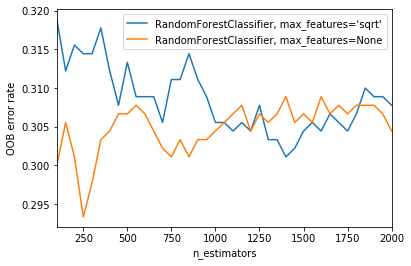

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 2000
step = 50

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators+step, step):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_knn, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()